<a href="https://colab.research.google.com/github/philimonkaminga/CS-361-Assignment/blob/main/feedForward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [4]:
df = pd.read_csv('Data/diabetes.csv')

# New Section

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df[df["Outcome"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [8]:
df[df["Outcome"]==1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [9]:
len(df[df['Outcome']==1]), len(df[df['Outcome']==0])

(268, 500)

#### Splitting the dataset into diabetis negative and positive


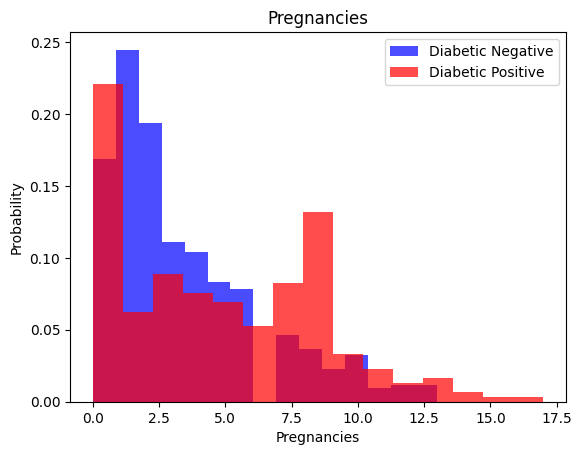

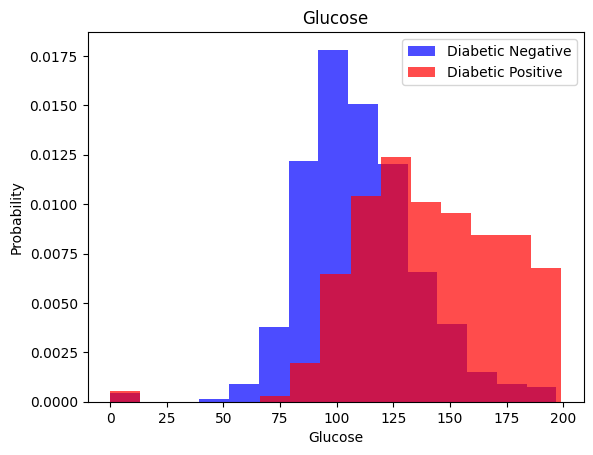

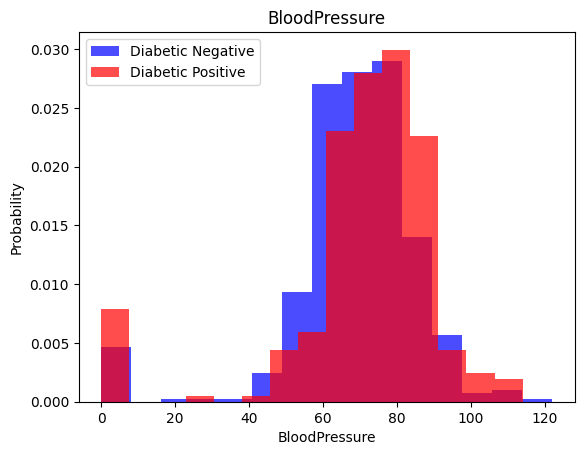

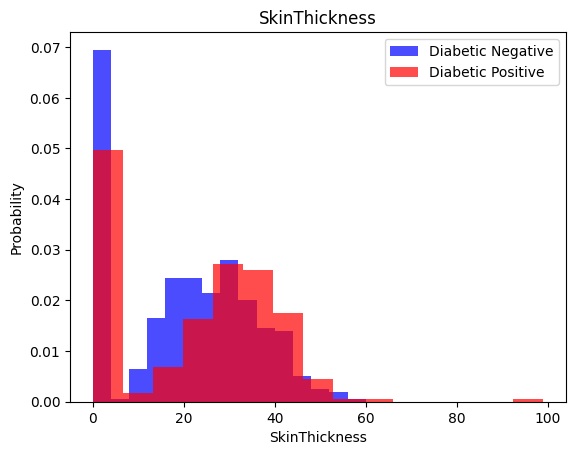

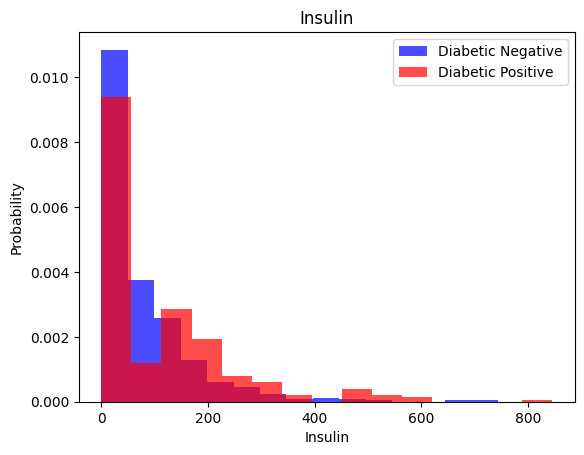

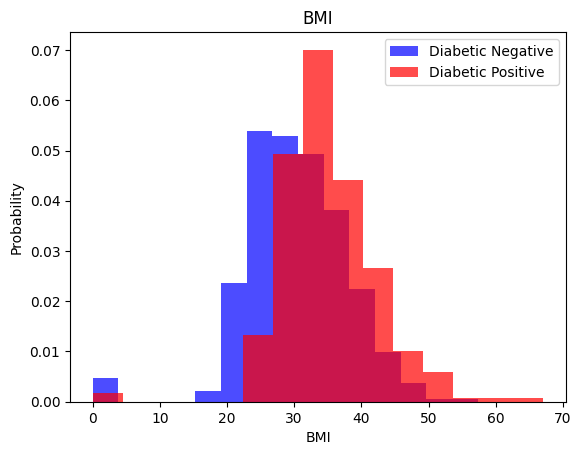

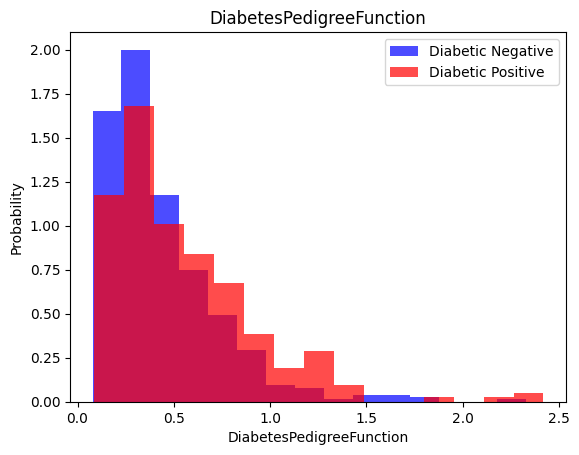

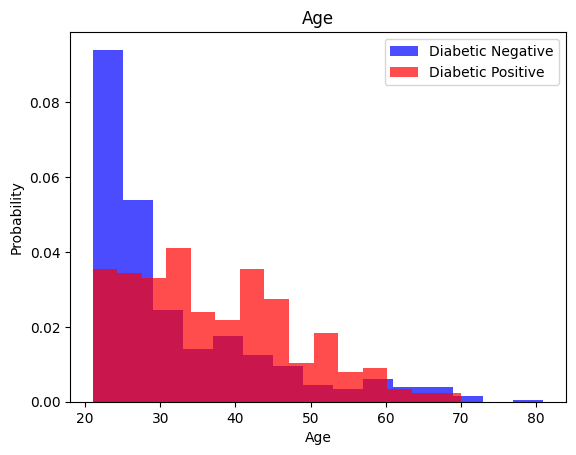

In [10]:
for i in range(len(df.columns[:-1])):
  lable = df.columns[i]
  plt.hist(df[lable][df["Outcome"]==0], label="Diabetic Negative", color="blue", alpha = 0.7, density=True, bins=15)
  plt.hist(df[lable][df["Outcome"]==1], label="Diabetic Positive", color= "red", alpha = 0.7, density=True, bins=15)
  plt.title(lable)
  plt.xlabel(lable)
  plt.ylabel("Probability")
  plt.legend()
  plt.show()

#### Splitting the X and y of the dataset

In [11]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [13]:
X.shape, y.shape

((768, 8), (768,))

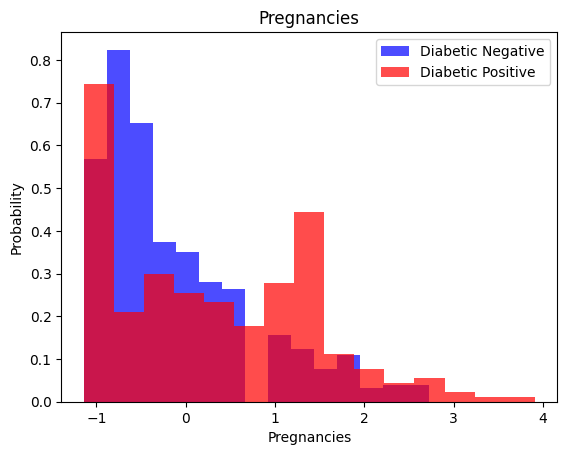

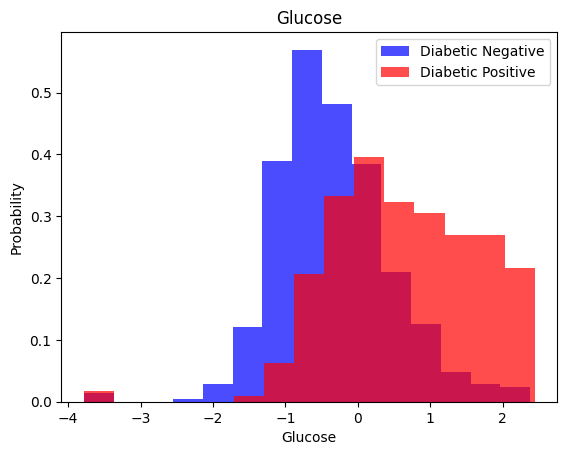

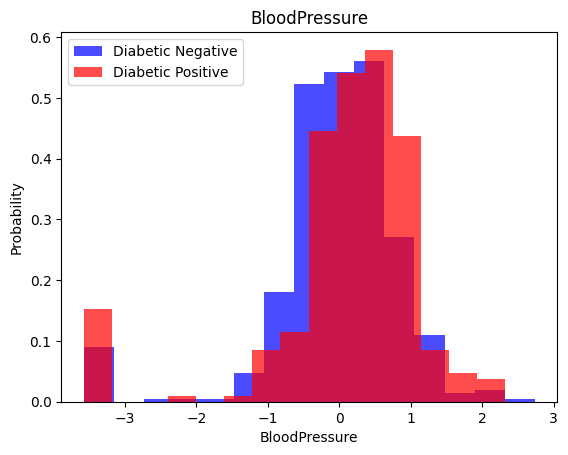

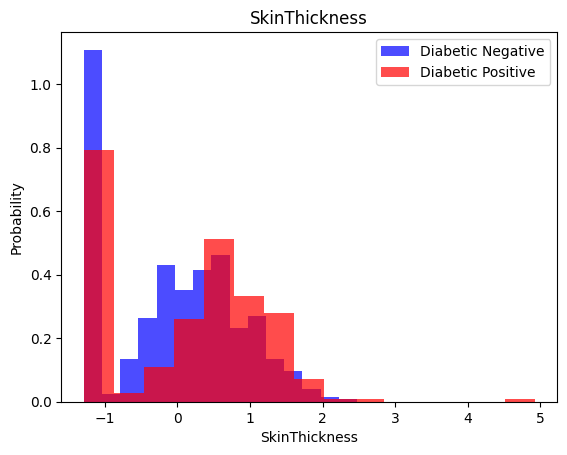

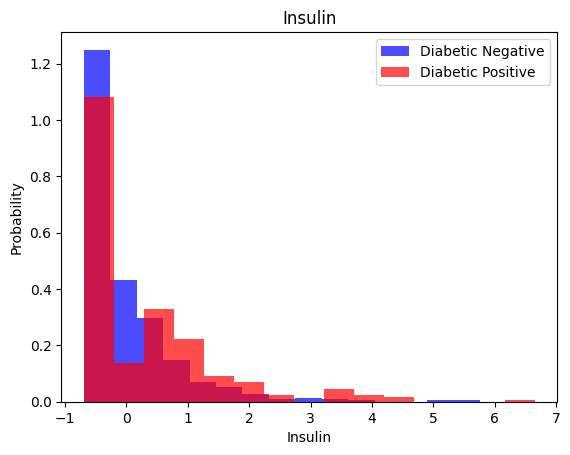

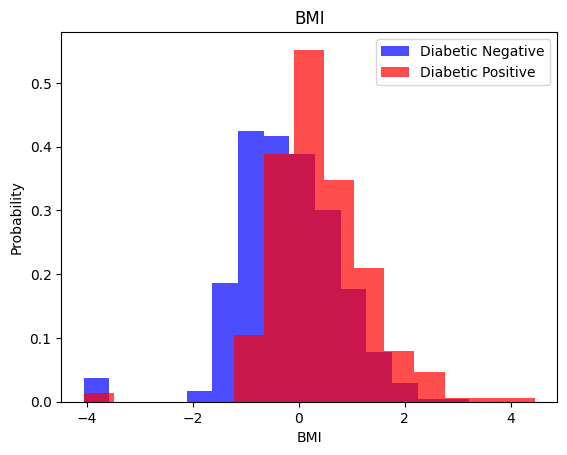

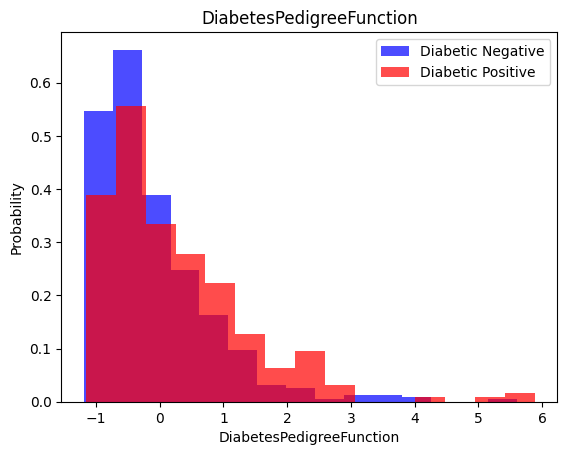

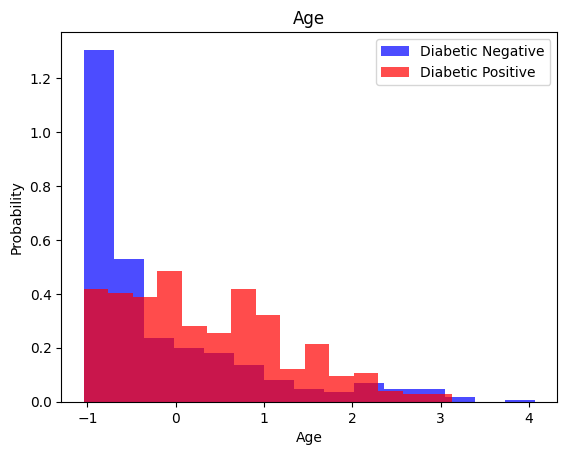

In [14]:
for i in range(len(df.columns[:-1])):
  lable = df.columns[i]
  plt.hist(transformed_df[lable][transformed_df["Outcome"]==0], label="Diabetic Negative", color="blue", alpha = 0.7, density=True, bins=15)
  plt.hist(transformed_df[lable][transformed_df["Outcome"]==1], label="Diabetic Positive", color= "red", alpha = 0.7, density=True, bins=15)
  plt.title(lable)
  plt.xlabel(lable)
  plt.ylabel("Probability")
  plt.legend()
  plt.show()

In [20]:
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

In [17]:
over = RandomOverSampler()
X, y = over.fit_resample(X, y)

In [21]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")

]

)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss =tf.keras.losses.BinaryCrossentropy(),
              metrics = ["accuracy"])

In [28]:
model.evaluate(X_train, y_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7853 - loss: 0.4650 


[0.4790925085544586, 0.7716666460037231]

In [27]:
model.evaluate(X_valid, y_valid)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7706 - loss: 0.4531 


[0.4453972578048706, 0.7749999761581421]

In [26]:
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_valid, y_valid))

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5351 - loss: 0.7048 - val_accuracy: 0.6650 - val_loss: 0.6466
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6954 - loss: 0.6266 - val_accuracy: 0.7500 - val_loss: 0.5842
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7306 - loss: 0.5889 - val_accuracy: 0.7750 - val_loss: 0.5454
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7176 - loss: 0.5564 - val_accuracy: 0.7600 - val_loss: 0.5202
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7194 - loss: 0.5237 - val_accuracy: 0.7700 - val_loss: 0.5017
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7187 - loss: 0.5439 - val_accuracy: 0.7650 - val_loss: 0.4919
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7426 - loss: 0.5141 - val_accuracy: 0.7600 - val_loss: 0.4798
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7585 - loss: 0.4964 - val_accuracy: 0.7650 - val_loss:

In [29]:
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7518 - loss: 0.4801 


[0.49173885583877563, 0.7599999904632568]